# **DBSCAN_Clustering (Density-Based Spatial Clustering of Applications with Noise)**

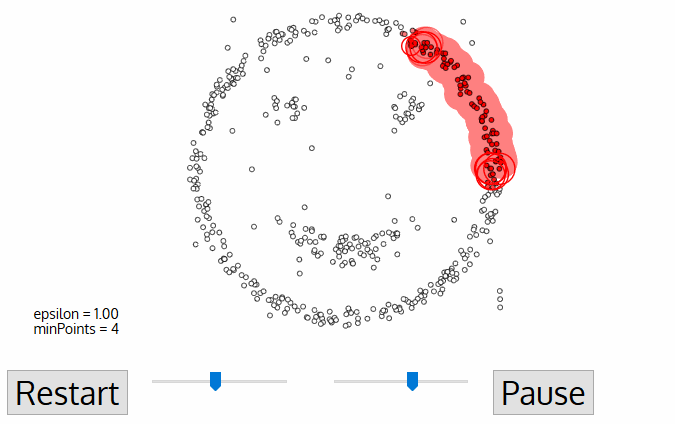

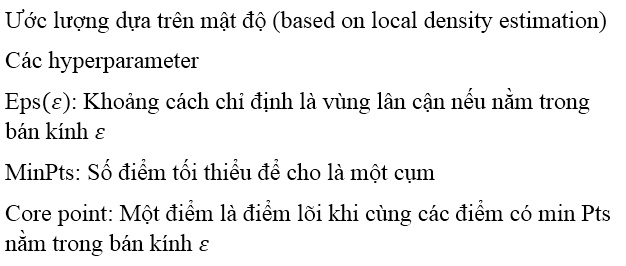

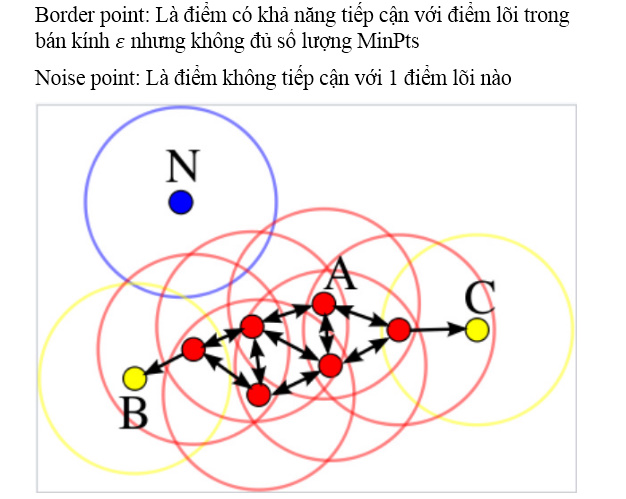

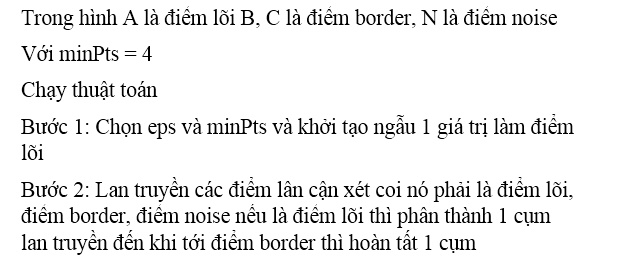

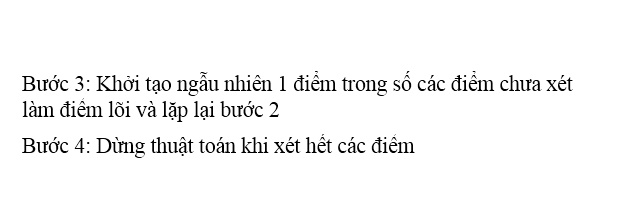

# **Tìm eps tối ưu cho thuật toán**
# **MinPts thường chọn = 2*dim**

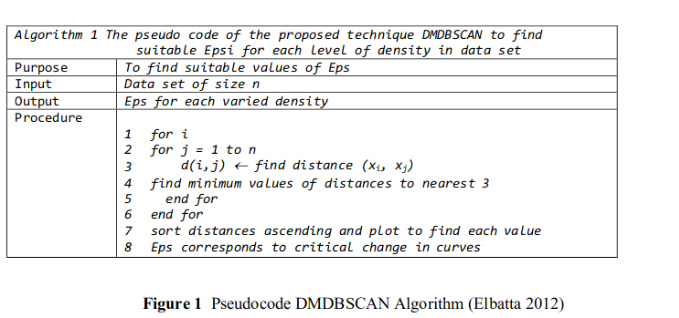

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
centers = [[1, 2], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=400, centers=centers, cluster_std=0.5, random_state=0)

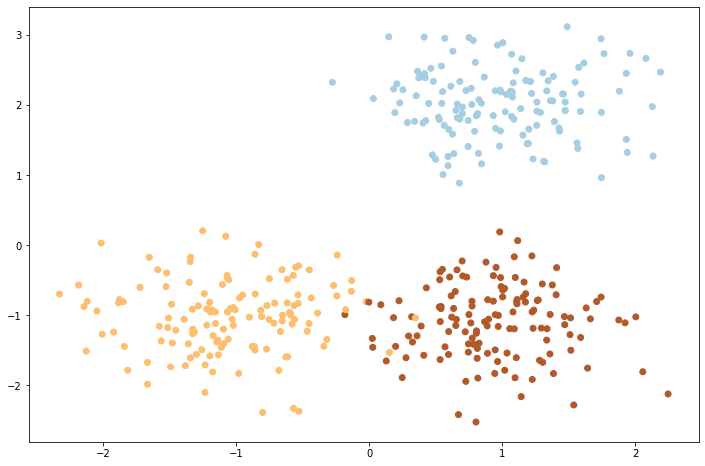

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.show()

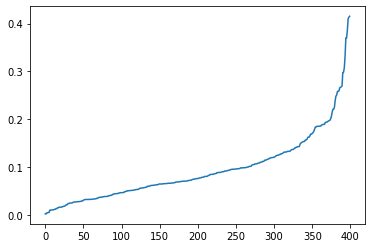

In [24]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances.shape
#Xắp xếp giá trị khoảng cách tăng dần
distances = np.sort(distances, axis=0)
#Chọn khoảng cách gần điểm đó nhất để plot
distances = distances[:,1]
plt.plot(distances)
plt.show()

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

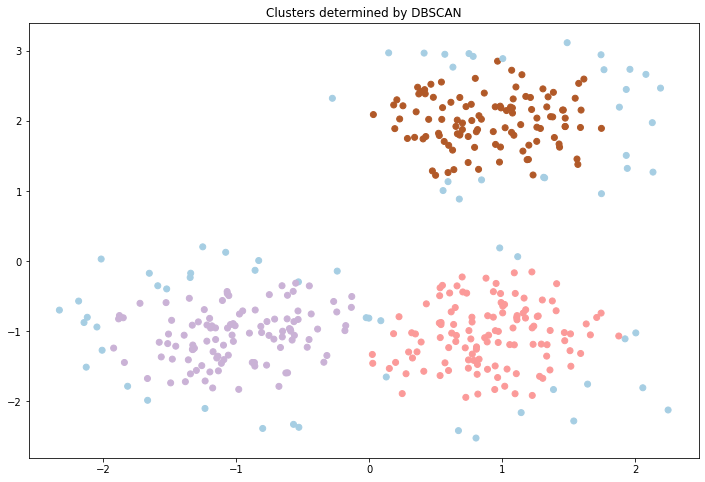

In [26]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.4,min_samples=20)
y_pred = db.fit_predict(X)
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

In [ ]:
#label -1 được cho là những điểm noise
db.labels_[:5]

array([ 0,  0,  1, -1,  2])

In [ ]:
# In ra chỉ số là core
db.core_sample_indices_

array([  0,   2,   4,   6,   7,   8,  10,  13,  14,  16,  17,  21,  22,
        24,  25,  26,  31,  32,  33,  35,  38,  39,  40,  42,  43,  44,
        45,  46,  47,  49,  52,  55,  56,  57,  59,  60,  61,  62,  63,
        65,  66,  67,  68,  69,  70,  72,  75,  77,  78,  79,  81,  83,
        85,  87,  89,  90,  91,  92,  95,  96,  98,  99, 100, 103, 104,
       109, 112, 113, 114, 115, 117, 119, 121, 123, 124, 126, 127, 129,
       134, 135, 136, 138, 140, 141, 143, 144, 146, 148, 150, 151, 154,
       156, 159, 160, 161, 163, 164, 165, 171, 177, 181, 183, 184, 186,
       190, 191, 192, 193, 199, 203, 212, 213, 217, 218, 220, 222, 224,
       227, 229, 232, 233, 234, 238, 239, 240, 242, 244, 252, 253, 255,
       256, 258, 259, 261, 262, 263, 264, 265, 266, 268, 272, 273, 274,
       275, 276, 280, 285, 286, 289, 292, 294, 295, 303, 305, 307, 308,
       309, 311, 314, 315, 316, 317, 318, 320, 321, 322, 323, 326, 329,
       332, 334, 336, 337, 338, 339, 340, 341, 344, 346, 349, 35

In [ ]:
db.components_[5:10]

array([[ 0.7462412 , -1.52594005],
       [ 0.98828845, -0.46040264],
       [-0.38756472, -0.96757195],
       [ 0.63547767, -0.9017213 ],
       [-1.35980219, -1.40649649]])